In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
import numpy as np

In [62]:
import sys
sys.path.insert(0, '../')
from toolkit import trappist1, transit_model, trappist_out_of_transit

g = trappist1('g')

In [63]:
bjd, flux, err, model, spotinds = np.loadtxt('g_lcbest.txt', unpack=True)

transit_model_g = transit_model(bjd, g)

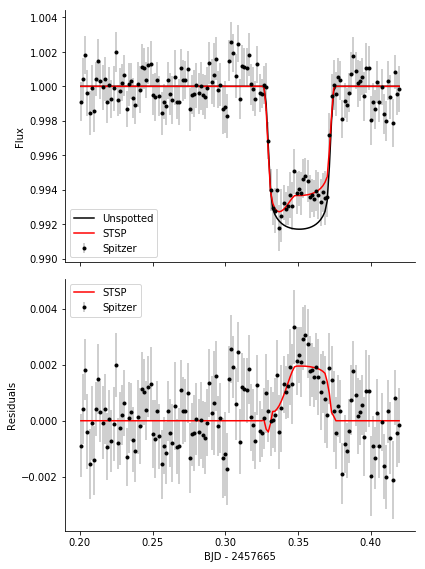

In [73]:
bjd_int = int(bjd.min())

fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
ax[0].errorbar(bjd - bjd_int, flux, err, fmt='.', color='k', ecolor='silver', label='Spitzer')
ax[0].plot(bjd - bjd_int, transit_model_g, color='k', label='Unspotted')
ax[0].plot(bjd - bjd_int, model, color='r', label='STSP')

ax[0].set(ylabel='Flux')
ax[0].legend(loc='lower left')

ax[1].errorbar(bjd - bjd_int, flux - transit_model_g, err, fmt='.', color='k', ecolor='silver', label='Spitzer')
ax[1].plot(bjd - bjd_int, model - transit_model_g, color='r', label='STSP')
ax[1].set(xlabel='BJD - {}'.format(bjd_int), ylabel='Residuals')
ax[1].legend(loc='upper left')
fig.tight_layout()

for axis in ax: 
    for i in ['right', 'top']:
        axis.spines[i].set_visible(False)
fig.savefig('stsp_model.png', bbox_inches='tight', dpi=200)

In [25]:
mcmc = np.loadtxt('g_mcmc.txt')
mcmc.shape

(164910, 8)

In [23]:
!cat g_parambest.txt

0.999890990914
2.731149824864
2.253775030336
1.091831160665
93.139417    chi squared
0.999891    radius
156.483358    theta
129.131797    phi
1.091831     unoccluded brightness


In [37]:
mcmc[0, :]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.49642064e+02,   1.59300000e-02,   1.99761000e+00,
         4.27730500e+00,   1.00000000e+00])

Text(0.5,0,'Radius')

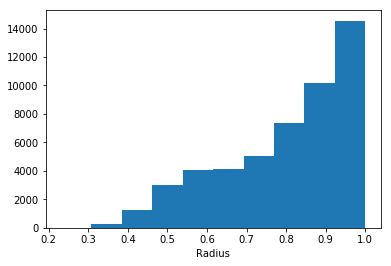

In [50]:
n = 50000
radius = mcmc[-n:, 4]
theta = mcmc[-n:, 5]
phi = mcmc[-n:, 6]

phi[phi > np.pi] -= 2*np.pi

plt.hist(radius)
plt.xlabel('Radius')

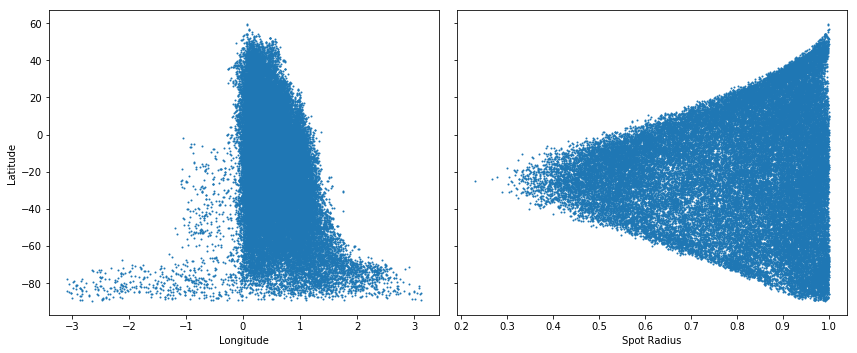

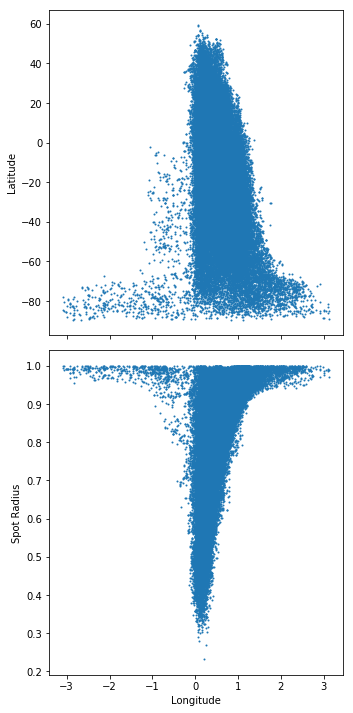

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].scatter(phi, np.degrees(np.pi/2 - theta), s=1)
ax[0].set(xlabel='Longitude', ylabel='Latitude')
ax[1].scatter(radius, np.degrees(np.pi/2 - theta), s=1)
ax[1].set(xlabel='Spot Radius')
fig.tight_layout()


fig, ax = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
ax[0].scatter(phi, np.degrees(np.pi/2 - theta), s=1)
ax[0].set(ylabel='Latitude')
ax[1].scatter(phi, radius, s=1)
ax[1].set(ylabel='Spot Radius', xlabel='Longitude')
fig.tight_layout()

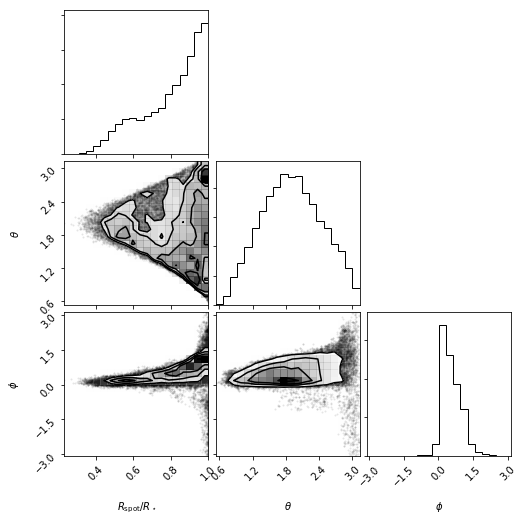

In [76]:
from corner import corner

corner(np.vstack([radius, theta, phi]).T, labels=[r'$R_\mathrm{spot}/R_\star$', r'$\theta$', r'$\phi$'])
plt.show()